In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [14]:
from fermipy.gtanalysis import GTAnalysis

In [15]:
gta = GTAnalysis.create('data/fit2_sed.npy')

2019-06-05 19:25:35 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.17.4 
ScienceTools version ScienceTools-11-04-00
2019-06-05 19:25:38 INFO    GTAnalysis.setup(): Running setup.
2019-06-05 19:25:38 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2019-06-05 19:25:38 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2019-06-05 19:25:38 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
2019-06-05 19:25:38 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2019-06-05 19:25:38 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2019-06-05 19:25:38 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2019-06-05 19:25:38 INFO    GTBinnedAnalysis.setup(): Running setup for component 01
2019-06-05 19:25:38 INFO    GTBinnedAnalysis._select_data(): Skipping data sel

In [16]:
gta.print_roi()

2019-06-05 19:31:27 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
FL8Y J1256.1-0547   PointSource    LogParabola       0.000  14198.13      7912.0
FL8Y J1258.7-0452   PointSource    PowerLaw          1.120      2.89        10.6
FL8Y J1249.3-0546   PointSource    PowerLaw          1.696      6.98       105.8
FL8Y J1304.4-0358   PointSource    PowerLaw          2.761      5.63       100.9
FL8Y J1243.9-0218   PointSource    PowerLaw          4.629     13.58        82.7
FL8Y J1315.9-0732   PointSource    PowerLaw          5.215     17.28        61.6
FL8Y J1234.7-0433   PointSource    PowerLaw          5.463      3.90        28.3
FL8Y J1256.2-1146   PointSource    PowerLaw          5.983     32.48       102.0
FL8Y J1322.3-0606   PointSource    PowerLaw          6.529      6.23        30.3
FL8Y J1233.7-0144   PointSource    PowerLaw          6.9

In [17]:
sed = np.load('data/fl8y_j1256.1-0547_sed.npy').flat[0]

In [18]:
np.sort(sed.keys())

array(['SpectrumType', 'config', 'correlation', 'dloglike_scan', 'dnde',
       'dnde_err', 'dnde_err_hi', 'dnde_err_lo', 'dnde_ul', 'dnde_ul95',
       'e2dnde', 'e2dnde_err', 'e2dnde_err_hi', 'e2dnde_err_lo',
       'e2dnde_ul', 'e2dnde_ul95', 'e_ctr', 'e_max', 'e_min', 'e_ref',
       'eflux', 'eflux_err', 'eflux_err_hi', 'eflux_err_lo', 'eflux_ul',
       'eflux_ul95', 'file', 'fit_quality', 'fit_status', 'flux',
       'flux_err', 'flux_err_hi', 'flux_err_lo', 'flux_ul', 'flux_ul95',
       'index', 'loge_ctr', 'loge_max', 'loge_min', 'loge_ref', 'loglike',
       'loglike_scan', 'model_flux', 'name', 'norm', 'norm_err',
       'norm_err_hi', 'norm_err_lo', 'norm_scan', 'norm_ul', 'norm_ul95',
       'npred', 'param_correlation', 'param_covariance', 'param_errors',
       'param_names', 'param_values', 'ref_dnde', 'ref_dnde_e_max',
       'ref_dnde_e_min', 'ref_e2dnde', 'ref_eflux', 'ref_flux',
       'ref_npred', 'ts'],
      dtype='|S17')

In [19]:
sed['e_min']

array([   100.        ,    133.35214322,    177.827941  ,    237.13737057,
          316.22776602,    421.69650343,    562.34132519,    749.89420933,
         1000.        ,   1333.52143216,   1778.27941004,   2371.37370566,
         3162.27766017,   4216.96503429,   5623.4132519 ,   7498.94209332,
        10000.        ,  13335.21432163,  17782.79410039,  23713.73705662,
        31622.77660168])

In [20]:
from astropy.io import fits

In [21]:
exp_hdu = fits.open('data/bexpmap_00.fits')

In [22]:
exp_hdu.info()

Filename: data/bexpmap_00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   (360, 180, 25)   float32   
  1  ENERGIES      1 BinTableHDU     13   25R x 1C   [1D]   
  2  GTI           1 BinTableHDU     18   2791R x 2C   [D, D]   


In [23]:
exp_hdu[1].data

FITS_rec([(   100.        ,), (   133.35214322,), (   177.827941  ,),
          (   237.13737057,), (   316.22776602,), (   421.69650343,),
          (   562.34132519,), (   749.89420933,), (  1000.        ,),
          (  1333.52143216,), (  1778.27941004,), (  2371.37370566,),
          (  3162.27766017,), (  4216.96503429,), (  5623.4132519 ,),
          (  7498.94209332,), ( 10000.        ,), ( 13335.21432163,),
          ( 17782.79410039,), ( 23713.73705662,), ( 31622.77660168,),
          ( 42169.65034286,), ( 56234.13251903,), ( 74989.42093325,),
          (100000.        ,)],
         dtype=(numpy.record, [('Energy', '>f8')]))

In [24]:
gta.energies

array([    100.        ,     133.35214322,     177.827941  ,
           237.13737057,     316.22776602,     421.69650343,
           562.34132519,     749.89420933,    1000.        ,
          1333.52143216,    1778.27941004,    2371.37370566,
          3162.27766017,    4216.96503429,    5623.4132519 ,
          7498.94209332,   10000.        ,   13335.21432163,
         17782.79410039,   23713.73705662,   31622.77660168,
         42169.65034286,   56234.13251903,   74989.42093325,  100000.        ])

In [25]:
sed['loge_min']

array([ 2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
        4.   ,  4.125,  4.25 ,  4.375,  4.5  ])

In [26]:
10**sed['loge_min']

array([   100.        ,    133.35214322,    177.827941  ,    237.13737057,
          316.22776602,    421.69650343,    562.34132519,    749.89420933,
         1000.        ,   1333.52143216,   1778.27941004,   2371.37370566,
         3162.27766017,   4216.96503429,   5623.4132519 ,   7498.94209332,
        10000.        ,  13335.21432163,  17782.79410039,  23713.73705662,
        31622.77660168])

In [31]:
loge_bins_input = np.array([ 2.   ,  2.125, 2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
        4.   ,  4.125,  4.25 ,  4.375,  4.5  , 5.0])

In [32]:
sed2 = gta.sed('3C 279', loge_bins = loge_bins_input)

2019-06-05 19:34:06 INFO    GTAnalysis.sed(): Computing SED for FL8Y J1256.1-0547
2019-06-05 19:34:07 ERROR   GTAnalysis.fit(): MINUIT failed with status code 101 fit quality 1
2019-06-05 19:34:07 ERROR   GTAnalysis.bowtie(): Failed to create FluxDensity
Traceback (most recent call last):
  File "/opt/anaconda/envs/fermi/lib/python2.7/site-packages/fermipy/gtanalysis.py", line 3912, in bowtie
    fd = FluxDensity.FluxDensity(self.like, name)
  File "/opt/anaconda/envs/fermi/lib/python2.7/site-packages/fermitools/FluxDensity.py", line 36, in __init__
    "number of free parameters.")
RuntimeError: Covariance matrix size does not match the number of free parameters.
2019-06-05 19:34:07 INFO    GTAnalysis._make_sed(): Fitting SED
2019-06-05 19:34:15 INFO    GTAnalysis.sed(): Finished SED
2019-06-05 19:34:15 INFO    GTAnalysis.sed(): Execution time: 8.55 s


In [33]:
c = np.load('data/fit2_sed.npy').flat[0]

In [34]:
E = np.array(c['sources']['FL8Y J1256.1-0547']['model_flux']['energies'])
dnde = np.array(c['sources']['FL8Y J1256.1-0547']['model_flux']['dnde'])
dnde_hi = np.array(c['sources']['FL8Y J1256.1-0547']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['FL8Y J1256.1-0547']['model_flux']['dnde_lo'])

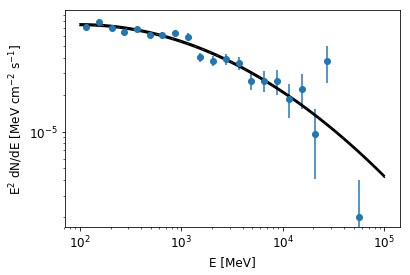

In [35]:
plt.loglog(E, (E**2)*dnde, 'k--')
plt.loglog(E, (E**2)*dnde_hi, 'k')
plt.loglog(E, (E**2)*dnde_lo, 'k')
plt.errorbar(np.array(sed2['e_ctr']),
             sed2['e2dnde'], 
             yerr=sed2['e2dnde_err'], fmt ='o')
plt.xlabel('E [MeV]')
plt.ylabel(r'E$^{2}$ dN/dE [MeV cm$^{-2}$ s$^{-1}$]')
plt.show()

In [1]:
import fermipy

In [2]:
fermipy.__file__

'/opt/anaconda/envs/fermi/lib/python2.7/site-packages/fermipy/__init__.pyc'